In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2308fc5f850>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x230945129d0>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


<AxesSubplot:xlabel='Date', ylabel='Inches'>

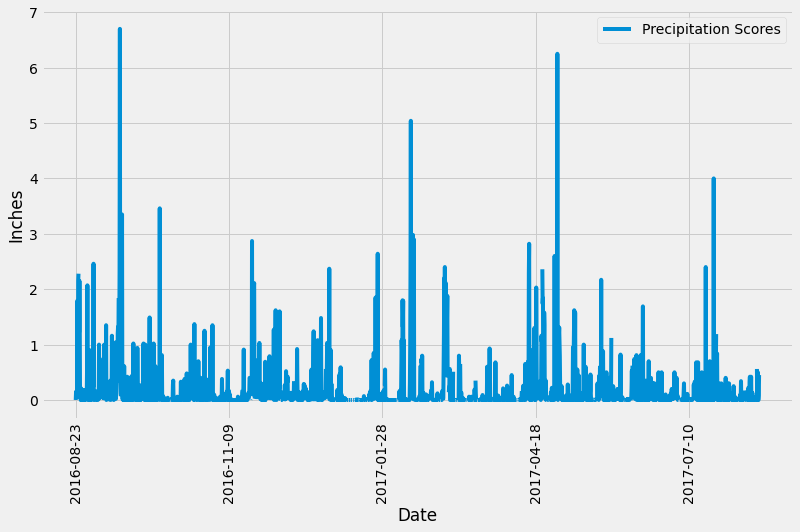

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# last_year_data = session.query(Measurement).order_by(Measurement.date.desc())
# Calculate the date one year from the last date in data set.
last_year = session.query(Measurement).order_by(Measurement.date).where(Measurement.date>'2016-08-22')

# Perform a query to retrieve the data and precipitation scores
Date_list = []
Prcp_list = []
for item in last_year:
    Date_list.append(item.date)
    Prcp_list.append(item.prcp)
df = pd.DataFrame(Prcp_list, Date_list)
df = df.rename(columns={0:'Precipitation Scores'})
# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

df.plot(xlabel="Date", ylabel="Inches", rot=90, figsize=(12,7))


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation Scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
print(f'The total number of stations is {total_stations}')

The total number of stations is 9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = engine.execute('SELECT station, COUNT(station) AS "Frequency count" \
                            FROM Measurement \
                            GROUP BY station \
                            ORDER BY "Frequency count" DESC;')
most_active = engine.execute('SELECT station, COUNT(station) AS "Frequency count" \
                            FROM Measurement \
                            GROUP BY station \
                            ORDER BY "Frequency count" DESC;').first()
for item in station_activity:
    print(item)
print(f'The most active station is {most_active[0]}')

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
The most active station is USC00519281


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active[0]).first()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active[0]).first()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active[0]).first()
print(f'The lowest temperature of station {most_active[0]} is {lowest_temp[0]}')
print(f'The highest temperature of station {most_active[0]} is {highest_temp[0]}')
print(f'The average temperature of station {most_active[0]} is {average_temp[0]}')

The lowest temperature of station USC00519281 is 54.0
The highest temperature of station USC00519281 is 85.0
The average temperature of station USC00519281 is 71.66378066378067


<AxesSubplot:ylabel='Frequency'>

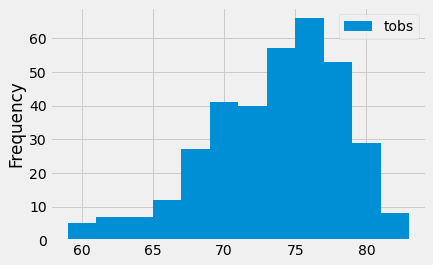

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement).order_by(Measurement.date).where(Measurement.date>'2016-08-22',Measurement.station == most_active[0])

temp_list = []
for item in temperature:
    temp_list.append(item.tobs)
    
temperatures = pd.DataFrame(temp_list).rename(columns={0:'tobs'})
temperatures.plot(kind='hist', bins=12)

# Close session

In [19]:
# Close Session
session.close()